#RESEARCH QUESTIONS

Do economically disadvantaged schools get more per pupil funding compared the economically advantaged schools?

How do the economically disadvantaged schools perfom on the SBA assement compared to the more advantages schools?

To what extent does increasing the per student funding for economically disadvantaged students help them improve their SBA scores?

================================================================================

#DATASET DESCRIPTION

My project uses the WA EDUCATION FUNDING DATA SET, from the "[NERDS-Edunomics Lab](https://edunomicslab.org/nerds/)" website. The dataset contains information about various school districts and schools in Washington from the 2019-2020 to 2023-2024 school years. SBA assesment scores by school is unavailable publicly as part of the NERDS data set. I am going to be refferring to the scatter plots on NERD$, that show the relationship of per student funding, poverty levels, and SBA scores.  

The variables that are being used in this project are **'ncesenroll', 'nces_freelunch', 'nces_poverty', 'nces_total_poverty', and 'pp_total_raw_WA'.**


**nces_freelunch:** Count of students eligible for the Free Lunch Program. This is a primary variable for analyzing the effects of poverty.

**nces_poverty:** The percentage of economically disadvantaged students. This directly addresses the concept of poverty.

**ncesenroll:** Total student enrollment. This is used to calculate other metrics and provide context.

**nces_total_poverty:** A calculated variable that represents the total number of students in poverty.

**pp_total_raw_WA:** The total amount of funding per student in Washington. This is also a key variable for analyzing funding.

================================================================================

#BACKGROUND INFORMATION

Federal and state funding is crucial for supporting school districts with essential needs such as teacher salaries, special needs programs, and free/reduced-price lunch programs. Private funding is rarely available for economically disadvantaged schools. A key federal program, Title I, specifically provides funding to schools with a high percentage of low-income students to help them meet academic standards.

For example, the Tukwila School District received significant federal fundings. In 2020, the district acquired over $1.75 million in Title I funding, because of the large amount of students eligible for free or reduced-price meals. Specifically, 71.92% of Tukwila students were eligibility for this program in 2020-2021, greater than King County's average of 36%. This essential federal support allows the district to provide free breakfast and lunch to all students. In addition, these funds can be used for hiring additional teachers, providing tutoring, offering summer school, purchasing materials, and offering online learning programs.

On the other hand, the Issaquah School District receives small amounts of Title I funding, because a low percentage of its students are eligible for free or reduced-price meals. While the King County average for free and reduced-price meal eligibility was about 36% in the 2020-2021 school year. For example, Issaquah School District has 6.9% of students eligable for fre-reduced lunch programs. When Title I funds are received, they are used to provide academic support in reading and math for a students who need it the most.

Title I is important for every school student because it helps build a stronger and equal country by giving every student, particularly the ones from low - income families, a chance to have good education and basic needs. In 2025, there are debates for removing federal funding for schools, and moving funding towards a choice school system. This means that it is super important to keep this program going so that our public schools can keep doing their job properly. Overall, Title I funding is essential for removing the dispairity for low - income families and making sure everyone has basic education to succeed in the future.

================================================================================

#DATA CLEANING

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sets up the columns that are in the school year data set that I am using and replaces all the NRD values in the data with NA
pd.set_option('display.max_columns', None)
df = pd.read_excel(r"WA 2019-20 school year funding.xlsx")


print(f"The amount of nulls in the student enrollment column was: {df['ncesenroll'].isnull().sum()}")
print(f"The amount of nulls in the student free lunch enrollment column was: {df['nces_freelunch'].isnull().sum()}")
print(f"The amount of nulls in the student poverty column was: {df['nces_poverty'].isnull().sum()}")


#Cleaning the data to replace every null value with the number 0
df_clean = df.copy()
df_clean=df_clean.replace("NRD", pd.NA)
print(f"The amount of nulls in the federal funding per student column was: {df_clean['pp_fed_raw_WA'].isnull().sum()}")
print(f"The amount of nulls in the total funding per student column was: {df_clean['pp_total_raw_WA'].isnull().sum()}")

df_clean['ncesenroll'] = df_clean['ncesenroll'].fillna(df_clean['ncesenroll'].mean())
df_clean['nces_freelunch'] = df_clean['nces_freelunch'].fillna(df_clean['nces_freelunch'].mean())
df_clean['nces_poverty'] = df_clean['nces_poverty'].fillna(df_clean['nces_poverty'].mean())
df_clean['nces_total_poverty'] = df_clean['nces_poverty']*df_clean['ncesenroll']
df_clean['pp_fed_raw_WA'] = df_clean['pp_fed_raw_WA'].fillna(df_clean['pp_fed_raw_WA'].mean())
df_clean['pp_total_raw_WA'] = df_clean['pp_total_raw_WA'].fillna(df_clean['pp_total_raw_WA'].mean())
df_clean['pp_ratio_fed_total_raw_WA'] = df_clean['pp_fed_raw_WA']/df_clean['pp_total_raw_WA']


print(f"The amount of nulls in the student enrollment column is now: {df_clean['ncesenroll'].isnull().sum()}")
print(f"The amount of nulls in the student free lunch enrollment column is now: {df_clean['nces_freelunch'].isnull().sum()}")
print(f"The amount of nulls in the student poverty column is now: {df_clean['nces_poverty'].isnull().sum()}")
print(f"The amount of nulls in the federal funding per student column is now: {df_clean['pp_fed_raw_WA'].isnull().sum()}")
print(f"The amount of nulls in the total funding per student column is now: {df_clean['pp_total_raw_WA'].isnull().sum()}")


df_clean.to_excel("WA_2019-2020_CLEANED_UPDATED.xlsx",index=False)

#Repeats this same code format for every school year file

The code above was used to clean the files:

WA 2019-20 school year funding.xlsx
WA 2020-21 school year funding.xlsx
WA 2021-22 school year funding.xlsx
WA 2022-23 school year funding.xlsx
WA 2023-24 school year funding.xlsx

**The code performs the following steps for each dataset:**

Replaced the **NRD values with NA values** throughout the file.

Checks for any null values in the ncesenroll, nces_freelunch, and nces_poverty columns of the file. Replaces and fills in the null values in these columns with the mean of the respective columns.

Creates a new column called **'nces_total_poverty'** by multiplying the poverty percentage by the student enrollment.

Saves the cleaned data to a new Excel file that has the same name as the original file but with the phrase "*_CLEANED_UPDATED_*" at the end.

#EXPLORARTORY DATA ANALYSIS (STATISITICS SUMMARY)



In [ ]:
import pandas as pd

#Reads the school year file
df = pd.read_excel('WA_2019-2020_CLEANED_UPDATED.xlsx')

# Select the main numerical columns for which to display statistics
numerical_columns = [
    'ncesenroll',
    'nces_freelunch',
    'nces_poverty',
    'nces_total_poverty',
    'pp_fed_raw_WA',
    'pp_total_raw_WA'
]

# Generate and print the summary statistics table
print("Summary Statistics for the 2019 - 2020 school year variables:")
print(df[numerical_columns].describe())


#Repeats this same code format for every school year file


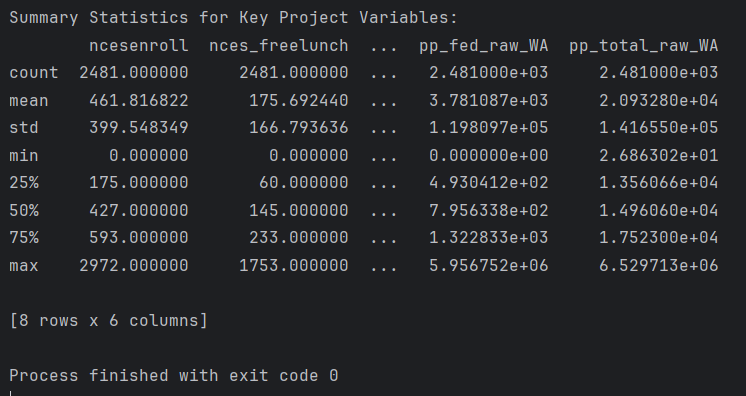

#**DATA VISUALIZATIONS**

#BAR GRAPH CODE AND OUTPUT

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Displays a bar graph for the following data set in the file
df = pd.read_excel(r"WA Free Lunch Enrollment Per School Year Data Collection_UPDATED.xlsx")
df_plot = df.groupby("School Year")[["Total Enrollment","Free Lunch Enrollment","Total Poverty"]].sum().reset_index()

df_long = df_plot.melt(id_vars="School Year",
                       value_vars=["Total Enrollment","Free Lunch Enrollment","Total Poverty"],
                       var_name="Enrollment Type",
                       value_name = "Number of Students"
                       )

sns.barplot(data = df_long,x="School Year", y="Number of Students", hue="Enrollment Type")
plt.title("WA Total and Free Lunch Enrollment Per School Year")
plt.xlabel("School Year")
plt.ylabel("Number of Students (in millions)")

#Displays the y-axis in terms of millions with the correct units
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y/1_000_000:.1f}M'))
plt.show()

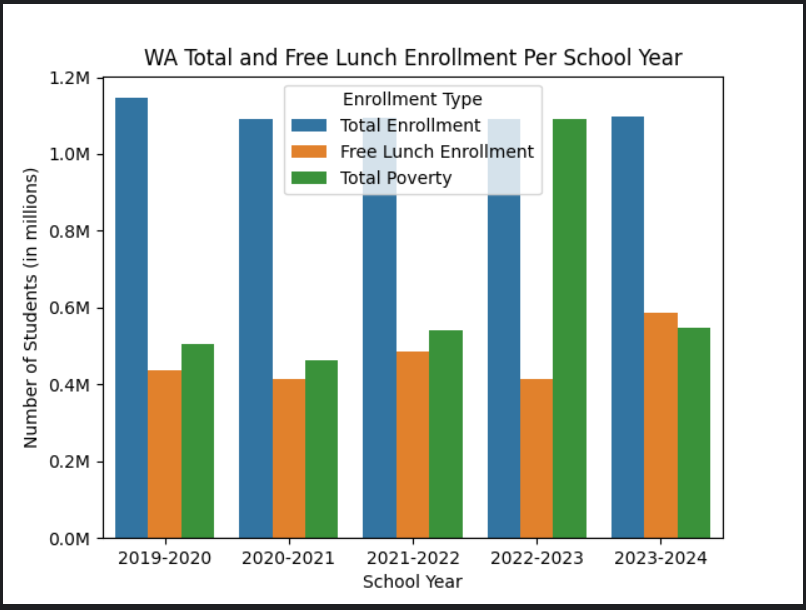

================================================================================

#SCATTERPLOT CODE AND OUTPUT

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats
import numpy as np

#Collates the data sets for each school year
files = {
    "WA_2019-2020_CLEANED_UPDATED.xlsx": "WA 2019-2020",
    "WA_2020-2021_CLEANED_UPDATED.xlsx": "WA 2020-2021",
    "WA_2021-2022_CLEANED_UPDATED.xlsx": "WA 2021-2022",
    "WA_2022-2023_CLEANED_UPDATED.xlsx": "WA 2022-2023",
    "WA_2023-2024_CLEANED_UPDATED.xlsx": "WA 2023-2024",
}

frames = []
for path, label in files.items():
    df = pd.read_excel(path)
    df["dataset"] = label
    frames.append(df)

every_data = pd.concat(frames, ignore_index=True)
sns.scatterplot(
    data=every_data,x="nces_poverty",y="pp_total_raw_WA",hue="year"
)

plt.title("Average Per_Pupil Funding by School vs Percentage Poverty(multiple datasets)")
plt.xlabel("Average NCES Percentage Poverty")
plt.ylabel("Average Per-Pupil Funding")

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _:f'{int(x/1000)}k'))
plt.grid(True, linestyle="--",alpha=0.3)
plt.tight_layout()
plt.show()

#Data has been limited to this amount because there were a ton of outliers when the y-axis was
# originally set to 7 million, so this inequality has been added to limit the y-axis to this
# amount in order to get reliable data

visual_data=every_data[every_data["pp_total_raw_WA"]<30_000]
sns.scatterplot(
    data=visual_data,x="nces_poverty",y="pp_total_raw_WA",hue="year"
)

plt.title("Average Per-Pupil Funding by School vs Percentage Poverty")
plt.xlabel("Average NCES Percentage Poverty")
plt.ylabel("Average Per-Pupil Funding")

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _:f'{int(x/1000)}k'))
plt.grid(True, linestyle="--",alpha=0.3)
plt.tight_layout()
plt.show()

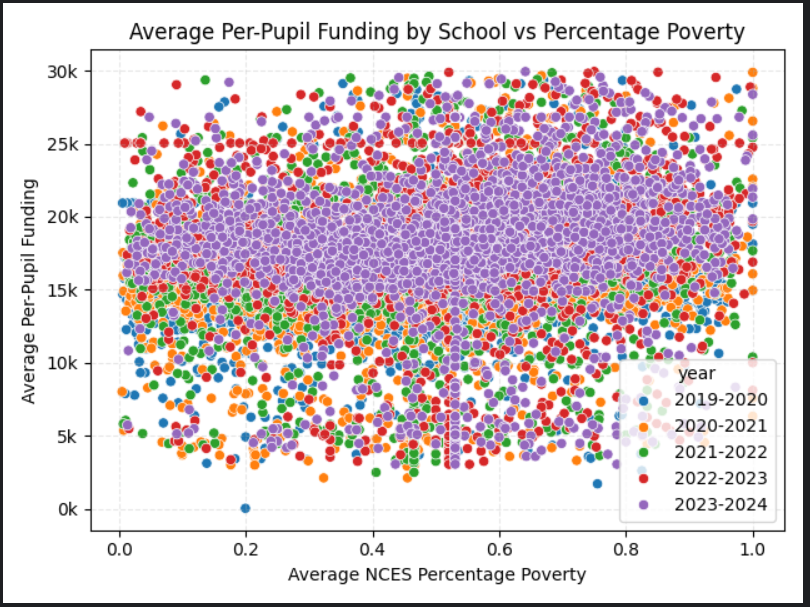

================================================================================

#REGRESSION LINE CODE AND OUTPUT (SEPARATE LINES + AVERAGE LINE)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

#Collates the data sets for each school year
files = {
    "WA_2019-2020_CLEANED_UPDATED.xlsx": "WA 2019-2020",
    "WA_2020-2021_CLEANED_UPDATED.xlsx": "WA 2020-2021",
    "WA_2021-2022_CLEANED_UPDATED.xlsx": "WA 2021-2022",
    "WA_2022-2023_CLEANED_UPDATED.xlsx": "WA 2022-2023",
    "WA_2023-2024_CLEANED_UPDATED.xlsx": "WA 2023-2024",
}

frames = []
for path, label in files.items():
    df = pd.read_excel(path)
    df["dataset"] = label
    frames.append(df)

every_data = pd.concat(frames, ignore_index=True)
sns.scatterplot(
    data=every_data,x="nces_poverty",y="pp_total_raw_WA",hue="year"
)

plt.title("Average Per_Pupil Funding by School vs Percentage Poverty(multiple datasets)")
plt.xlabel("Average NCES Percentage Poverty")
plt.ylabel("Average Per-Pupil Funding")

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _:f'{int(x/1000)}k'))
plt.grid(True, linestyle="--",alpha=0.3)
plt.tight_layout()
plt.show()

#Data has been limited to this amount because there were a ton of outliers when the y-axis was
# originally set to 7 million, so this inequality has been added to limit the y-axis to this
# amount in order to get reliable data

visual_data=every_data[every_data["pp_total_raw_WA"]<30_000]
sns.scatterplot(
    data=visual_data,x="nces_poverty",y="pp_total_raw_WA",hue="year"
)

palette=sns.color_palette("tab10", n_colors=every_data["year"].nunique())
year_colors=dict(zip(sorted(every_data["year"].unique()), palette))

#Overlaying regression line of best fit that shows the average for every school year (first image)
for yr in every_data["year"].unique():
    sns.regplot(
        data=every_data[every_data["year"]==yr],
        x="nces_poverty",
        y="pp_total_raw_WA",
        scatter=False,
        color=year_colors[yr],
        label=f"{yr} regression"
    )

sns.regplot(
        data=every_data,
        x="nces_poverty",
        y="pp_total_raw_WA",
        scatter=False,
        color="black",
        label="average regression"
    )

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Legend", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("Average Per-Pupil Funding by School vs Percentage Poverty")
plt.xlabel("Average NCES Percentage Poverty")
plt.ylabel("Average Per-Pupil Funding")

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _:f'{int(x/1000)}k'))
plt.grid(True, linestyle="--",alpha=0.3)
plt.tight_layout()
plt.show()


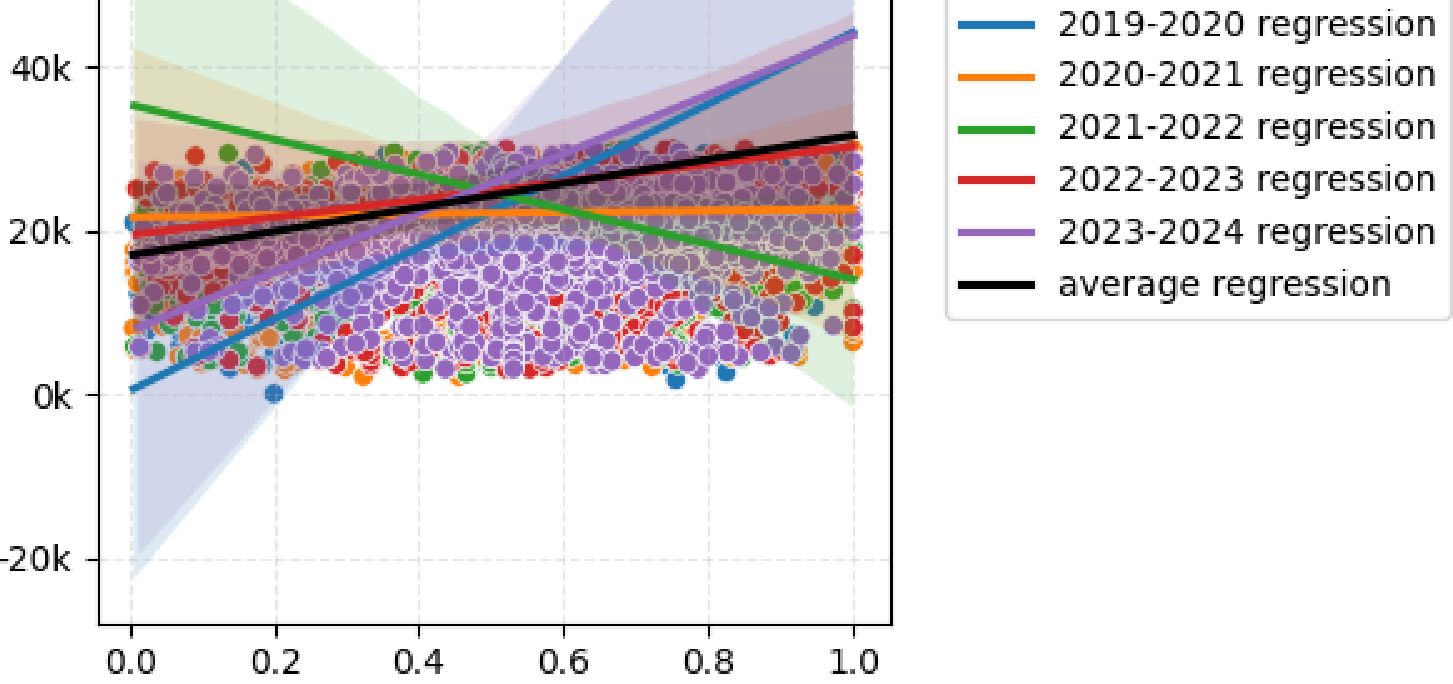

#PER PUPIL FUNDING VS SBA SCORES SCATTERPLOTS

#WASHINGTON STATE (2023-2024)
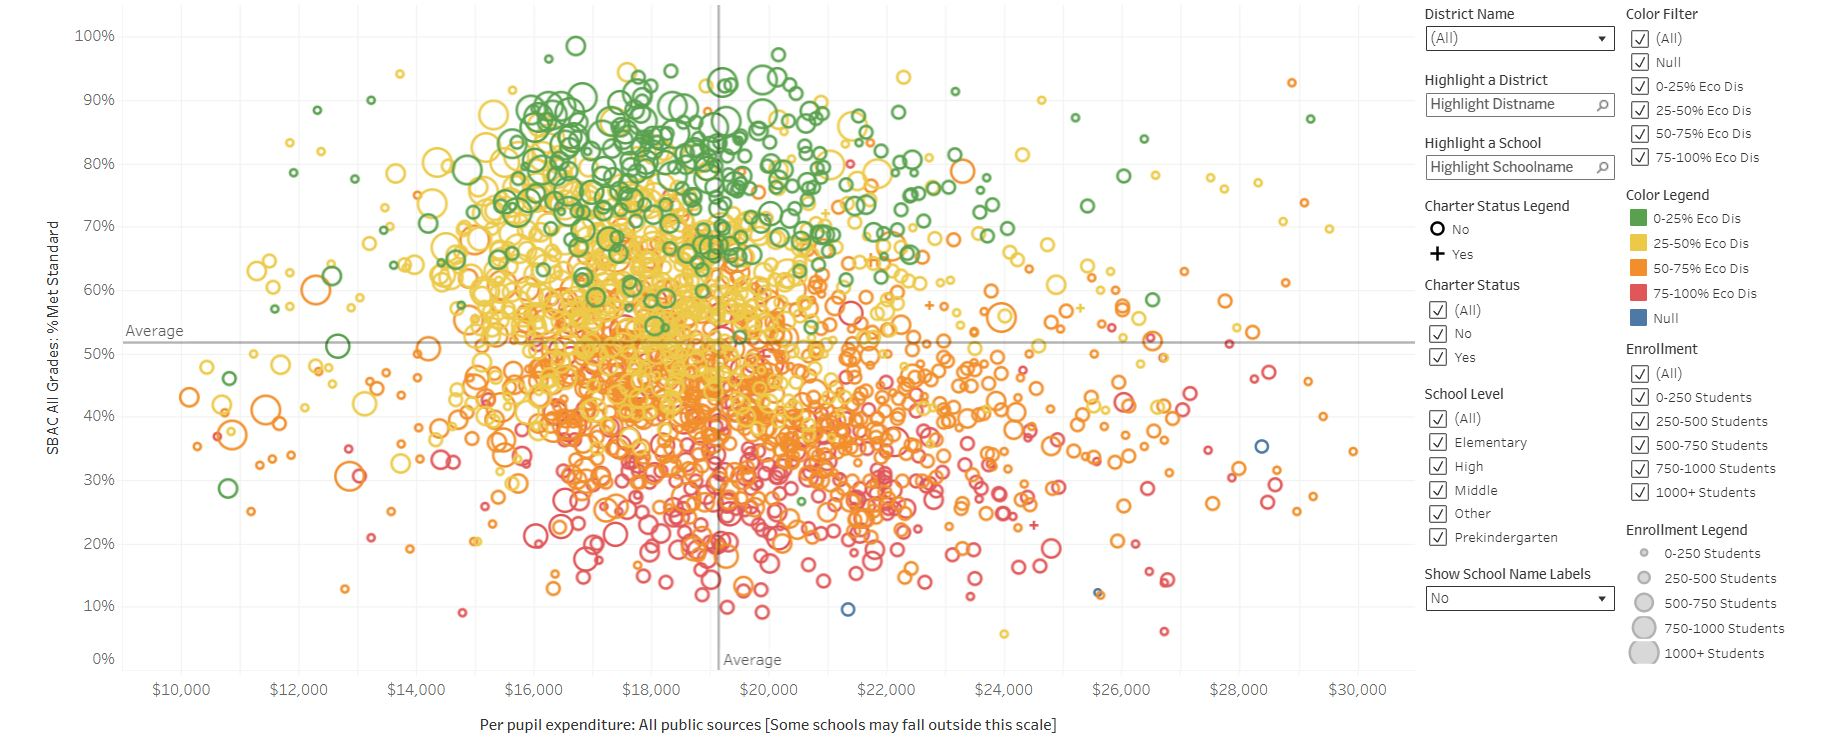



#OHIO STATE (2023-2024)

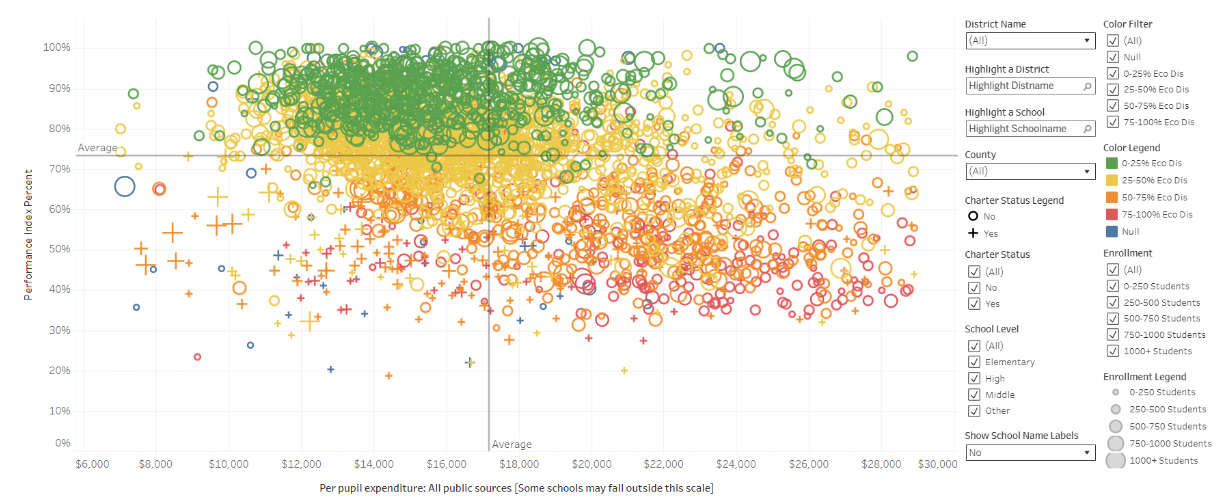

SOURCE: THE TWO SCATTERPLOTS ABOVE ARE FROM THE NERDS EDUNOMICS DATA SITE, THE AVERAGE SCHOOL SBA SCORE DATASET IS PUBLICLY UNAVAILABLE

#**STATISTICAL ANALYSIS**

#CONFIDENCE INTERVALS

In [ ]:
from scipy import stats
import numpy as np


school_avg = (
    every_data.groupby("schoolid_stateassigned",as_index=False).agg({
        "nces_poverty": "mean",
        "pp_total_raw_WA": "mean"
    })
)

#Establishes the boundaries of the high and low ranges
high_threshold = 0.55
low_threshold = 0.25

#Determines the characteristics of the ranges in trms of poverty and per student funding
high_poverty = school_avg[school_avg['nces_poverty']> high_threshold]['pp_total_raw_WA'].dropna()
low_poverty = school_avg[school_avg['nces_poverty']<= low_threshold]['pp_total_raw_WA'].dropna()

#Calculates the mean for the high poverty and low poverty
mean_poverty_high=np.mean(high_poverty)
mean_poverty_low=np.mean(low_poverty)

# Prints amount of per pupil fundings for the ranges of high and low poverty
print(f"Mean per pupil funding - High Poverty Schools: {mean_poverty_high:.2f}")
print(f"Mean per pupil funding - Low Poverty Schools: {mean_poverty_low:.2f}")
print("-------------------------")

#Sets and prints confidence interval start and end range values for high poverty
conf_int_low,conf_int_high = stats.t.interval (
    confidence = 0.95,
    df=len(high_poverty)-1,
    loc=mean_poverty_high,
    scale=stats.sem(high_poverty),
)

print(f"95% Confidence Interval (High Poverty Schools %): [{conf_int_low:.2f}%, {conf_int_high:.2f}%]")

#Sets up and prints the confidence interval start and end range values for low poverty
conf_int_low,conf_int_high = stats.t.interval (
    confidence = 0.95,
    df=len(low_poverty)-1,
    loc=mean_poverty_low,
    scale=stats.sem(low_poverty),
)

print(f"95% Confidence Interval (Low Poverty Schools %): [{conf_int_low:.2f}%, {conf_int_high:.2f}%]")

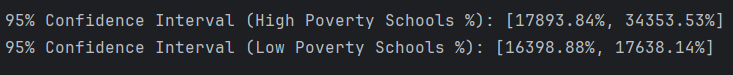

================================================================================

#HYPOTHESIS TESTING

P-Values (Hypothisis Testing)

Let us test to see if the average per-pupil student funding is higher when the poverty pecentage rates are high.

Null Hypothesis (H₀): The average per-pupil funding is the same no matter what the poverty percentage is.

Alternative Hypothesis (H₁): The average per-pupil student funding amounts are high when the poverty percentages are at high.

In [ ]:
from scipy import stats
import numpy as np

school_avg = (
    every_data.groupby("schoolid_stateassigned",as_index=False).agg({
        "nces_poverty": "mean",
        "pp_total_raw_WA": "mean"
    })
)

#Establishes the boundaries of the high and low ranges
high_threshold = 0.55
low_threshold = 0.25

#Determines the characteristics of the ranges in trms of poverty and per student funding
high_poverty = school_avg[school_avg['nces_poverty']> high_threshold]['pp_total_raw_WA'].dropna()
low_poverty = school_avg[school_avg['nces_poverty']<= low_threshold]['pp_total_raw_WA'].dropna()

#Sets the conditions for the hypothesis testings
t_stat, p_val = stats.ttest_ind(high_poverty,low_poverty,equal_var=False)

#Prints out the values to determine which hypothesis is being accepted
print(f"T_Statistic is: {t_stat:.2f}")
print(f"P_Value is: {p_val:.4f}")

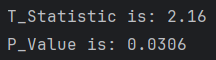

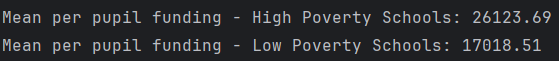

================================================================================

#SPEARMANS CORRELATION

In [ ]:
from scipy.stats import spearmanr

# Calculates the Spearman correlation coefficient and Spearman p-value
spearman_corr, spearman_p_val = spearmanr(school_avg['nces_poverty'], school_avg['pp_total_raw_WA'])

# Prints the Spearman's correlation values
print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"P-Value: {spearman_p_val:.4f}")
print("-------------------------")

#Calculates the mean for the high poverty and low poverty
mean_poverty_high=np.mean(high_poverty)
mean_poverty_low=np.mean(low_poverty)

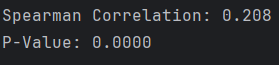

================================================================================

#INTERPERATION OF DATA RESULTS



The Mean Value For Per Pupil Funding In High Poverty Schools was **$26123.69**

The Mean Value For Per Pupil Funding In High Poverty Schools was **$17018.51**

T-Test Statistic = 2.16

P-Value = 0.0000

Correlation: **0.208** ---> Weak Positive Correlation ---> Higher Poverty Rates and Per Pupil Funding have a somewhat direct relationship.



#EVALUATION OF VALIDITY

**Construct Validity**

The study's constructs are measured correctly because all the key variables are included. Using per-pupil funding, percentage poverty rates, and SBA assessment scores provides a complete and correct way to study how money and poverty affect school performance.


**External Validity**

The study's findings can be applied to other schools and districts. The dataset includes a wide range of per-student funding, poverty rates, and SBA assessment scores, which allows the conclusions to be used for other groups of students.


**Internal Validity**

The study's ability to show a direct cause-and-effect relationship between funding, poverty, and student performance is strong. This is because the project has SBA assessment scores that allows it to directly connect changes in funding to changes in student scores.



#CONCLUSION / ANALYSIS STATEMENT

This project shows a clear understanding on how school funding, poverty rates, and student performance are related with each other in Washington schools.

The **mean** for per pupil funding in high poverty schools is 26K dollars. On the other hand, the mean for per pupil funding in low poverty schools is 17K dollars.**Overall, high poverty schools recieve more per pupil funding than low povery schools.**

The **confidence interval of 95%** shows that there is no overlap of per pupil funding amounts in both the high poverty and low poverty ranges. **This means that there is a difference in funding between these two groups, and high poverty schools recieve more per pupil funding than low poverty schools.**

The statistical analysis of spearmans correlation shows positive monotonic relationship (correlation of 0.208) between percentage poverty rates and per-pupil funding. In other words, when the poverty rates increase, the per pupil funding also increases, but not in a straight line. In the scatterplot, there are outliers that show that some years get a lot of funding allocations.

A T-Test result of 2.16 with a p-value of 0.0000 proves that the funding differences in high-poverty schools are real and not just by chance. The T-stat value is moderately strong enough to reject the null hypothesis. The p-value is less than 0.05, and it is also able to reject the null hypothesis.

***Question One: Do economically disadvantaged schools get more per pupil funding compared the economically advantaged schools?***

Overall, the statistical analysis shows that when the percentage poverty is high, then the per pupil funding is also high. The data analysis also shows that when the percentage poverty is low, then the per pupil funding is low, **thus showing a direct relationship.**

***Question Two: How do the economically disadvantaged schools perfom on the SBA assement compared to the more advantages schools?***

The above scatter plots from the NERD$ Database showcase how the per student funding in both the states of Washington and Ohio correlate with the SBA scores of each school. In Washington state, the range of SBA scores for the economic disadvantaged students (red circles) is 10% to 40%, and that is on the lower end compared to the other WA schools. On the other hand, the range of SBA scores in Ohio state is 30% - 60%, but the red circle range is still on the lower end compared to the other schools. It is also clear that schools with more poverty (75-100% Eco Dis) have lower scores than those with less poverty (0-25% Eco Dis), which are in a higher scoring group, **meaning that the correlation is true.**

***Question Three: To what extent does increasing the per student funding for economically disadvantaged students help them improve their SBA scores?***

In the Washington state, there is an average of 19,000 per student funding. The amount of per student funding for the red schools is distributed **mostly** on the higher end of the average ($19,000), and the SBA scores are between the range of 10% to 40%. However, Ohio state has a similar average per student funding compared to Washington. The **majority** of the red schools have a greater per student funding compared to Washington, and have a higher range of SBA scores with it being 30% to 60%. **Overall, this information shows that a higher per student funding for economically disadvantaged students does improve their SBA, but the results might vary based on how states use their funding.**
